In [6]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from utils import *

# Functions

# Mismatch

In [7]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla","hlahd"]
#tool_list=["hlavbseq"]

missed_alleles = []

for t in tool_list:
    missed_alleles_caller = []
    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")
    
        ret = get_inaccurate_and_all_alleles(pre,gs)
        missed_alleles_caller.append(ret[0])
    missed_alleles.append(missed_alleles_caller)



In [8]:
mis_total = []
all_total = np.array([1084, 1080, 1088, 1180, 980]) #5 element vector with # of gold standard A, B, C, DRB, and DQB

for tool in missed_alleles:
    mis_counts = [0,0,0,0,0]
    for d in tool:
        for allele in d:
            if allele[0] == "A":
                mis_counts[0]+=1
            if allele[0] == "B":
                mis_counts[1] += 1
            if allele[0] == 'C':
                mis_counts[2] += 1
            if allele[0:2] == 'DR':
                mis_counts[3] += 1
            if allele[0:2] == 'DQ':
                mis_counts[4] += 1
    mis_total.append(mis_counts)

percentage = mis_total/all_total
print(percentage)

[[0.01383764 0.01574074 0.01654412 0.02627119 0.00306122]
 [0.01476015 0.07685185 0.01470588 0.02457627 0.02653061]
 [0.08210332 0.11481481 0.09742647 0.88220339 0.95714286]
 [0.00276753 0.01111111 0.00551471 0.         0.        ]
 [0.00830258 0.05925926 0.02665441 0.02457627 0.39591837]
 [0.00369004 0.02222222 0.02205882 0.06779661 0.        ]
 [0.00369004 0.02222222 0.02205882 0.10254237 0.07040816]
 [0.06549815 0.05185185 0.05790441 0.06355932 0.06326531]]


# Plots

In [9]:
df = pd.DataFrame(mis_total)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = ["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla","hlahd"]
df

,A,B,C,DRB1,DQB1
arcas,15,17,18,31,3
hlaforest,16,83,16,29,26
hlavbseq,89,124,106,1041,938
optitype,3,12,6,0,0
phlat,9,64,29,29,388
rna2hla,4,24,24,80,0
seq2hla,4,24,24,121,69
hlahd,71,56,63,75,62


In [10]:
df = pd.DataFrame(percentage)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = ["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla","hlahd"]
df

,A,B,C,DRB1,DQB1
arcas,0.013838,0.015741,0.016544,0.026271,0.003061
hlaforest,0.014760,0.076852,0.014706,0.024576,0.026531
hlavbseq,0.082103,0.114815,0.097426,0.882203,0.957143
optitype,0.002768,0.011111,0.005515,0.000000,0.000000
phlat,0.008303,0.059259,0.026654,0.024576,0.395918
rna2hla,0.003690,0.022222,0.022059,0.067797,0.000000
seq2hla,0.003690,0.022222,0.022059,0.102542,0.070408
hlahd,0.065498,0.051852,0.057904,0.063559,0.063265


<AxesSubplot:>

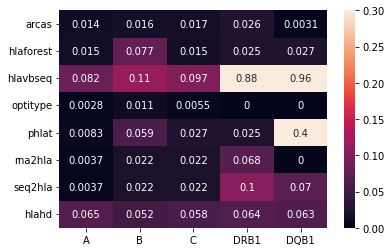

In [16]:
from matplotlib.colors import LogNorm, Normalize
sns.heatmap(df,annot=True,vmin=0,vmax=0.3)